# Age of Information - an Introduction

The Age of Information (AoI) concept has recently been proposed in Information sciences, and researchers have already demonstrated its value as a tool to measure system’s performance. The AoI measures the time passed since a source of information, e.g., sensor, has generated information, e.g., took an observation, in the form of a status update. Each status update contains a timestamp revealing when the update was generated. These status updates are then collected at the sink, e.g., a monitor, where the timeliness of information is measured.   

## Basic Concepts
Firstly, we need to introduce some concepts from queueing theory. In the particular system, we have origin, queue(s) and server(s). When considered collectively, we refer to them as the **system**. In the image bellow, we might observe **a single server queue**, which is the system consisting of only one queue and one server.
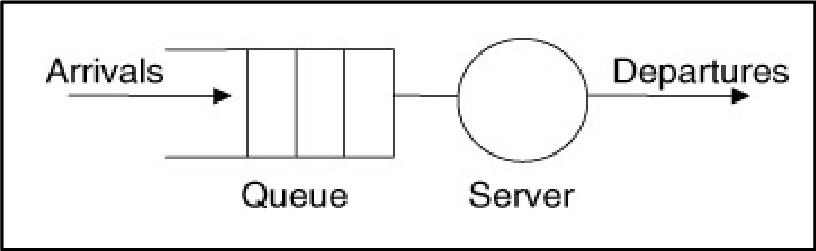

As we observed in the previous image, there might be several clients waiting in the queue. How can we then determine which one has the priority to be served first? There are two common approaches. If we aim for fairness, the client who arrived first deserves to be served first. A system in which clients are served in the order they arrived chronologically is referred to as the **First-Come-First-Served queue (FCFS)**. However, for various reasons (which is quite common), we might reverse the order and serve the last one first, and so forth. This is known as **Last-Come-First-Served (LCFS)**.

*Comment: Common reason for picking LCFS instead of FCFS is to minimize AoI.*

The previous image might be misleading, as there could be multiple queues and servers, not just one. Here's an example of a multiple-server queue.
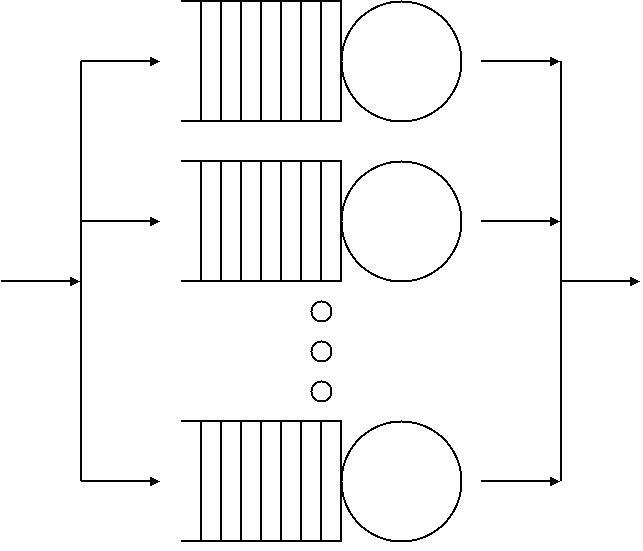

Now that we have a basic understanding of what the system looks like and how the order of service might be, we can completely determine the system by using rules for arrival and service times. These rules are typically stochastic, meaning that inter-arrival and service times are not deterministic but vary according to a certain probability distribution. The reverse values of the expectations of these distributions are known as the rate of arrivals and the rate of service times, respectively.

As is typical in probability theory and statistics, we are particularly interested in the long-term behavior of the system. It's important to note that if the rate of arrivals is greater than the rate of service times, the queue will almost certainly become longer and longer over time. We refer to such a system as unstable. In this and the following tutorials, our focus will solely be on stable systems, which implies that the fraction $\rho = \frac{\lambda}{\mu}$, referred to as the **server utilization**, lies within the interval $(0,1)$.

Suppose that inter-arrival times follow the distribution $X$, serving times follow the distribution $Y$, and that there are $c$ servers and queues. In this case, we denote such a queue as $X/Y/c$. At times, we might include an additional parameter $n$, which indicates the maximum capacity of the queue. If there is no fourth parameter, we assume that $n = \infty$. Therefore, for instance, $X/Y/c/n$ represents a system with a queue having a maximum capacity of $n$ customers. On the other hand, in the $X/Y/c$ system, there are infinitely many spots available in the queue.

Earlier, we discussed the order in which customers are served. There are two systems: LCFS and FCFS. To differentiate between these two, we use an asterisk * at the end or leave it out. If there's an asterisk at the end, it signifies the LCFS system; otherwise, it denotes FCFS. For instance, the queue $M/M/1$ follows FCFS, while $M/M/1*$ indicates LCFS.

### Questions for Revision

Answers for those questions can be found in previous subsection called *Basic concepts* or last subsection called *Solutions*.

1. What constitutes the system in queuing theory (3)?
2. In which orders customers can be served (2)?
3. How do we call the system in which customers are served in reversed order in which they arrived?
4. How do we call the system in which customers are served in the same order in which they arrived?
5. How do we mark a specific queue?
6. Let's assume that inter-arrival times are distributed according to distirbution X, serving times according to distribution Y, there are 5 queues and we serve with rule FCFS. How do we mark such system? What if we have LCFS rule instead?

## Single Server Queues Examples

If a random variable follows an exponential distribution (https://en.wikipedia.org/wiki/Exponential_distribution), we label it as $M$ (for Markov: https://en.wikipedia.org/wiki/Andrey_Markov). On the other hand, if it is deterministic, we represent it with the letter $D$, or if the exact distribution is not entirely known, we use $G$, which stands for general.

The most basic three examples of single-server queues are $M/M/1$, $M/D/1$ and $D/M/1$. In the next tutorial they will be discussed in detail. In those examples we have FCFS system. If we furhermore add an asterisk at the end: $M/M/1*$, $M/D/1*$, $D/M/1*$ we have LCFS system instead of FCFS. 

Maybe it would be appropriate to explain on $M/M/1$ and $M/M/1*$ what exacly those two systems are. In the first and the second one customers are coming with inter-arrival times that are distributed exponentially. We have the same distribution for serving times in both examples and one queue. But as already said, in first system customers are ordered in the same order as they have come. On the other hand in second example first are last and last are first. 

We might also encounter $G/D/1$, which represents a system with an unknown inter-arrival distribution, a deterministic serving time distribution, and one queue. I have provided all these examples to ensure that you perceive the pattern. As I elucidated in the preceding section, an additional numeric parameter can be appended to the designation to specify the maximum capacity of the queue.

### Questions for Revision

7. What does $D$ stands for? What about $M$ and $G$?
8. Describe the system $M/G/2$.
9. Describe the system $M/M/1/2$.
10. Describe the system $M/M/1/2*$.

## Age and Latency

In this chapter we refer to the customers in the system as packets. 

**Age** refers to the freshness or timeliness of data within a system. More precisely, it denotes the age of the last packet that has reached the server. Therefore, it changes over time, as the age of a specific packet increases by one second each second. Furthermore, the last packet that reaches the server is not always the same, so graph jumps up or down; it is, in fact, a piecewise linear function.

Let's consider a First-Come-First-Served order of service. In such systems, the age will consistently decrease as new packets arrive. The rationale behind this is that packets arrive at the server chronologically, and each new packet is slightly fresher than the previous one. The age increases linearly between two consecutive packets since time is a linear function of itself. Due to these properties, the age function takes on a sawtooth shape.

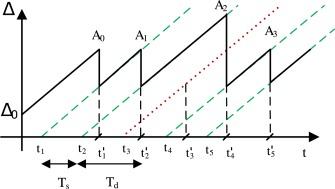

Let's asign this function letter $\Delta(t)$. This is the function of time. Usually we rather speak about average age because it is a specific number. Let's define this average age $\Delta$. Firstly we define average age till the time $\tau$, asigned with $\Delta_\tau$:

$$\Delta_\tau = \frac{1}{\tau} \int_{0}^{\tau} \Delta(t) dt $$.

Than we define longterm average with the next limit:

$$\Delta = \lim_{\tau \to \infty} \Delta_{\tau} $$.

We need to be careful not to confuse age with latency. **Latency** originally refers to a specific packet and tells us how long this packet needed from origin to server. However, in our case, we assign latency to the system, which is the same as the average of latencies (in the original sense) of its packets. More rigorously, suppose that $l_n$ is the latency of the $n$-th packet. Furthermore, let's say that $L_n$ denotes the average latency of a system until the $n$-th arrival. Then we may define the latency of the system as:

$$L = \lim_{n \to \infty} L_n $$

if the limit exists. We may notice that $L_n$ is much more turbulent for small values of $n$ and stable for larger values of $n$, assuming that the system is stable. If the system is not stable, it will almost certainly tend to infinity.

When we compare latency and age, we notice that age is always greater. This is because the latency of a specific packet represents one of the local minimums of the age function (not the average age). Age, on the other hand, is the average height of the graph of the age function, while latency represents the average value of latencies. It's important to note that the above is only a heuristic derivation and not a proof.

Mathematicians have derived formulas for certain examples of these systems. In this tutorial, we will only present results for the $M/M/1$ and $M/D/1$ queue. To do this, we define utilization as $\rho = \frac{\lambda}{\mu}$. In this context, $\lambda$ represents the rate of arrivals, and $\mu$ represents the rate of service, which is equivalent to the amount of time the server is busy. In the first subsection, I mentioned that systems with $\rho < 1$ are stable. We will graph the average age for the $M/M/1$ and $M/D/1$ queues as $\rho$ ranges within the interval from 0 to 1.

For the $M/M/1$ queue, the average age follows the function $\Delta = \frac{1}{\mu} \Big( 1 + \frac{1}{\rho} + \frac{\rho^2}{1-\rho} \Big)$. On the other hand, the $M/D/1$ queue corresponds to the function $\Delta = \frac{1}{\mu} \Big( \frac{1}{2(1-\rho)} + \frac{1}{2} + \frac{(1-\rho)\exp(\rho)}{\rho} \Big)$. We keep $\mu = 1$ constant and observe the ages with respect to $\lambda \in (0,1)$. 

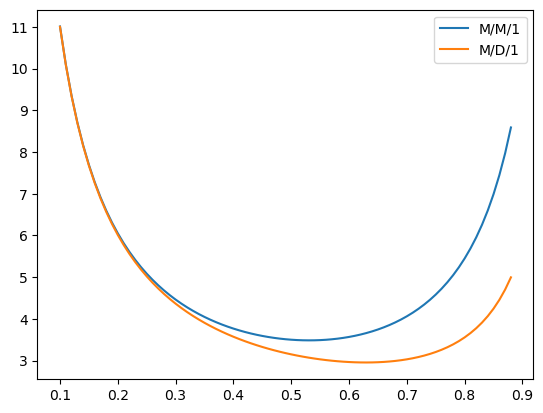

In [1]:
#Import libraries for mathematical calcualtions, array representations and plotting.
import math
import numpy as np
import matplotlib.pyplot as plt

#Create array with 80 x-values between 0.1 and 0.9. Distance between
#them is 0.01.
x_sez = []
x = 0.1
for i in range(79):
    x_sez.append(x)
    x += 0.01
    
#Functions that mathematicians derived for ages of M/M/1 and M/D/1 queues.     
def age_MM1(arrival_rate: float):
    """Returns the average age for M/M/1 queue with arrival rate arrival_rate 
    and serving rate 1.
    
    Parameters
    ----------
    arrival_rate: float
        Number between 0 and 1 that represents arrival rate of designed
        M/M/1 queue.
        
    Returns
    --------
    float
        Number that represents the average age.
    """
    return 1 + 1/x + x**2/(1-x)
def age_MD1(arrival_rate: float): 
    """Return the average age for M/D/1 queue with arrival rate arrival_rate 
    and serving rate 1.
    
    Parameters
    ----------
    arrival_rate: float
        Number between 0 and 1 that represents arrival rate of designed
        M/D/1 queue.
        
    Returns
    --------
    float
        Number that represents the average age.
    """
    return 1/(2*(1-x))+1/2+(1-x)*math.exp(x)/x
    
#Create arrays with values of ages for M/M/1 and M/D/1 queue for all x in array x_sez.     
y_sez1 = [] #Here ages for M/M/1 queue will be saved
y_sez2 = [] #Here ages for M/D/1 queue will be saved
for x in x_sez:
    y_sez1.append(age_MM1(x))
    y_sez2.append(age_MD1(x))
    
#Transform all three arrays from python list form into the numpy array form, so we are going to be able to plot it. 
x_points = np.array(x_sez)
y1_points = np.array(y_sez1)
y2_points = np.array(y_sez2)

#Plot both ages according to arrival rate and fixed serving rate to 1. 
plt.plot(x_points, y1_points, label="M/M/1")
plt.plot(x_points, y2_points, label="M/D/1")
plt.legend()

plt.show()

We can note that for small arguments ages of $M/M/1$ queue (blue) and $M/D/1$ queue (orange) are very similar but they increase in distance as we move to the right on the graph. System is somehow smoother if we have deterministic serving time instead of random. It is possible to calculate that age for $M/M/1$ queue is minimal for $\rho$ = 0.53 which means that server is busy just a bit more often than idle. On the other hand minimal age for $M/D/1$ is achieved for $\rho$ = 0.625. 

For now, we have seen the difference between ages of $M/M/1$ and $M/D/1$ queue. What about difference between age and latency only for $M/M/1$ queue? Instead of deriving formulas for those two, we rather simulate the problem using Python libraries Numpy and its submodule Random.

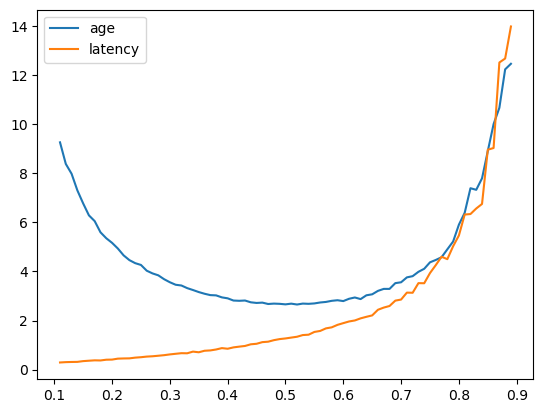

In [4]:
# In this document I am going to simulate MM1 queue and measure the average age and average latency. 
# Import libraries for plotting, array representation and random sampling. 
import matplotlib.pyplot as plt
import numpy as np
from numpy import random 
import pandas as pd

# Let's pack everything into a function.
def average_tuple(scale_of_arrivals: float, time_step=0.1, total_time=100000):
    """Function gets average age and average latency of a system till certain time 
    for specific scale of arrivals and scale of servings. 

    Parameters
    ----------
    scale_of_arrivals : float
        Scale of arrivals of M/M/1 queue
    time_step : float
        Time step in our process. 
    total_time : int
        Total time of calculation. 

    Returns
    -------
    list
        a list of floats that represents average age and average latency for designed system.
    """
    number = total_time * 2 #number of arrivals and servings
    
    list_of_arrivals = [] #here arrival times are saved
    t = random.exponential(scale=(1/scale_of_arrivals)) #First arrival time
    list_of_arrivals.append(t)
    #Create all of the remaining arrival times. 
    for i in range(number):
        t = random.exponential(scale=(1/scale_of_arrivals)) + list_of_arrivals[-1]
        list_of_arrivals.append(t)
    
    #We than create a list of update intervals. 
    list_of_update_intervals = random.exponential(scale=1, size=number)
    
    #Now, the crutial part. 
    ar_ind = 0 #index of next arrival
    up_ind = 0 #index of next update
    inter_update_time = 0
    time = 0
    queue = []
    age = 0 #current age
    age_list = [] #we are going to add current age at every time step
    latency_list = [] #we are going to add latency of a packet at every beginning of serving.
    for i in range(int(total_time / time_step)): #We make n steps of time unit equal to time step. 
        inter_update_time += time_step
        time += time_step
        age += time_step
        # if inter_update_time is already bigger than it should be, we take the next element if there is one. 
        if inter_update_time > list_of_update_intervals[up_ind] and len(queue) != 0:
            age = time - queue[0]
            latency_list.append(age)
            queue = queue[1:]
            inter_update_time = 0
            up_ind += 1
        # if time is already bigger than we append the next element to the queue. 
        if time > list_of_arrivals[ar_ind]:
            queue.append(list_of_arrivals[ar_ind])
            ar_ind += 1
        age_list.append(age)

    al = 0 #we will sum all the ages in this parameter.
    for e in age_list:
        al += e
    average_age = al / len(age_list)
    
    de = 0 #we will sum all the latencies in this parameter.
    for e in latency_list:
        de += e
    average_latency = de / len(latency_list) 
    return [average_age, average_latency]

#Now we look at average ages for different scales of arrivals and plot the results. 
x_sez = [] #here all points on x-axis will be saved
x = 0.11
for i in range(79):
    x_sez.append(x)
    x += 0.01
    
y_sez = [] #here all values of average age are stored. 
for e in x_sez:
    y = average_tuple(e)[0]
    y_sez.append(y)
    
y_sez1 = [] #here all values of latency are stored.
for e in x_sez:
    y = average_tuple(e)[1]
    y_sez1.append(y)
    
data_dict = {'x': x_sez, 'y': y_sez}
df_dict = pd.DataFrame(data_dict)
df_dict.to_csv("age_vs_delay.csv", index=False)
    
# we transform lists above in numpy objects so that we are able to plot it.     
x_points = np.array(x_sez)
y_points = np.array(y_sez)
y_points1 = np.array(y_sez1)

#We plot both graphs into the same coordinate system. 
plt.plot(x_points, y_points, label="age")
plt.plot(x_points, y_points1, label="latency") 
plt.legend()
plt.show()


We see that for small arguments age (blue) is much bigger than latancy (orange). That may clear the confusion around the difference between age and latency. Latancy tells us how long average packet stays in the system as age tells us what is the age of most current customer in average. It would be the same if we would always have new customer coming. But as there are bigger time gaps between arrivals of specific packets, age gains time in comparison to latency. 

Another way to distinguish between age and latency is by observing the code directly. We only append the current age as an element to the latency_list when the age is at its local minimum, whereas we add the age to the age_list at every time step.

However, we may notice that on the right side of the graph, for some points, latency is greater. The reason for this is that age started at zero, while latency began with its first non-zero value.

### Questions for revision

11. What is the difference between age and latency?
12. Which system has for some $\rho$ smaller age: $M/M/1$ or $M/D/1$?

## Basic Queueing Formulas

In this subsection we will discuss some basic queueing formulas. For that we will need to introduce some notation. Firstly, note that the time packet spends in the system is assembled from time in the queue and time at the server. Let $L$ be mean number of customers in the system, $L_q$ mean number of customers in the queue. Let $W$ be the mean waiting time in the system and $W_q$ mean waiting time in the queue. With all of the previous notation, we can simbolically write Little's rules:
$$ L = \lambda W; L_q = \lambda W_{q}$$
Another useful relationship in the queue is:
$$ W = W_q + \frac{1}{\mu} $$
the above is intuitive: it says the mean wait in the *system* is the sum of the mean wait in the *queue* and the service time ($\frac{1}{\mu}$). 
In 2014, Seldon M. Ross proved that for the $M/M/1$ it holds:
$$ L_q = \frac{\rho^2}{1-\rho} $$.
Remember: $\rho$ is difined as a fraction $\rho = \frac{\lambda}{\mu}$.
And for the $M/G/1$ queue:
$$ L_q = \frac{\lambda^2\sigma_s^2 + \rho^2}{2(1-\rho)} $$
where $\sigma_s^2$ is variance of the service time that has general distribution. 

### Exercises using queuing formulas

1. **Consider the following single-server queue: the inter-arrival time is exponentially distributed with a mean of 10 minutes and the service time is also exponentially distributed with a mean of 8 minutes, find the (i) mean wait in the queue, (ii) mean number in the queue, (iii) the mean wait in the system, (iv) mean number in the system and (v) proportion of time the server is idle.**

Solution: Because both distributions are exponential, we have $M/M/1$ queue. As Ross proved mean number in that queue is:
$$ L_q = \frac{\rho^2}{1-\rho}. $$
In our example $\rho$ is $\frac{\frac{1}{10}}{\frac{1}{8}} = \frac{4}{5}$, so $L_q = 3.2$, which is the answer to (ii). From $L_q = \lambda W_q$ follows that $W_q = \frac{L_q}{\lambda} = 32$, which is the answer to (i). We get answer to (iii) from another Little's rule:
$$ W = W_q + \frac{1}{\mu}, $$
which yields $40$ minutes in our case. Little also solves (iv) cause $L = \mu W = 4$. Because $\rho$ is the proportion of time server is busy, is $1 - \rho$ proportion of time that server is idle, so in our case $20$ %. 

2. **Consider the following single-server queue: the inter-arrival time is exponentially distributed with a mean of 10 minutes and the service time has the uniform distribution with a maximum of 9 minutes and a minimum of 7 minutes, find the (i) mean wait in the queue, (ii) mean number in the queue, (iii) the mean wait in the system, (iv) mean number in the system and (v) proportion of time the server is idle.**

Solution: In this case we have $M/G/1$ system. We will first calculate mean number in the queue. We need $\lambda = \frac{1}{10}$, $\rho = \frac{4}{5}$ and we must calculate $\sigma_s^2$. Since, it is variance of serving time and variance of uniform distribution with maximum $b$ and minimum $a$ is $\frac{(b-a)^2}{12}$, $\sigma_s^2 = \frac{1}{3}$. It follows that $L_q = 1.6$. From that we get
$W_q = \frac{L_q}{\lambda} = 16$ minutes. In this example we can also just follow Little's rules and get that $W = W_q + \frac{1}{\mu} = 24$ minutes. So, $L = 2.4$ and finally server is idle $20$ % of the time.

## Solutions

1. Parts of system are origin, queue(s) and server(s).
2. Customers can be served in FCFS order or LCFS order.
3. We call such system LCFS.
4. We call such system FCFS.
5. We mark it with $X/Y/c$ notation.
6. Answer to the first question is $X/Y/5$ and to the second $X/Y/5*$.
7. $D$ stands for deterministic, $M$ exponential and $G$ general.
8. $M/G/2$ is a system in which there are 2 queues, customers are arriving with exponential distiribution and serving time is not determined. Order is FCFS.
9. $M/M/1/2$ is a system in which there is 1 queue, customers are arriving and being served in time distributed exponentially. Order is FCFS but we are only accepting at most 2 customers in the queue.
10. Everything the same as in privious example except order is LCFS instead of FCFS. 
11. Argument can be found in subsection *Age and latency*.
12. For all arguments $\rho$ age of $M/D/1$ is smaller but the difference increase with increasing argument.